## 1: Import required packages & functions <a class="anchor" id="chapter1"></a>

In [29]:
print('Importing libraries')

%reset -f

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# clear all variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))

#suppress future warnings -- not really a good idea 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import required dependencies
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
from keras.models import Model
from keras.layers import Input, Dense
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, silhouette_score
import csv
import xlrd
import math
from matplotlib import figure
from IPython.display import FileLink, FileLinks
from IPython.display import set_matplotlib_formats
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#import utils
#from utils import encode_features_v3

set_matplotlib_formats('png', 'pdf') # uses vector figures in pdf exports --
plt.style.use('seaborn-pastel')

# create a folder
def create_folder(folder):
    import os     
    try: 
        os.mkdir(folder) 
    except FileExistsError:
        print("Directory [ %s ] already exists"%folder)

Importing libraries


## 2: Load data   <a class="anchor" id="chapter2"></a>

In [30]:
create_folder("Misclassified")

dataset = pd.read_csv('Classification/new_balanced_no_AB.csv');
dataset = dataset.drop(columns=['Case'])
X = dataset.iloc[:,:-1]
y = np.ravel(dataset.iloc[:,-1])

Directory [ Misclassified ] already exists


## 3: Function to predict for all classifiers   <a class="anchor" id="chapter3"></a>

In [31]:
logreg_fscore_mean=[]; logreg_precision_mean=[]; logreg_recall_mean=[]; logreg_balanced_acc_mean=[]
logreg_sens_mean=[]; logreg_spec_mean=[]; logreg_acc_mean=[]; 
logreg_average_precision_mean=[]; logreg_auc_mean=[];

dt_fscore_mean=[]; dt_precision_mean=[]; dt_recall_mean=[]; dt_balanced_acc_mean=[]
dt_sens_mean=[]; dt_spec_mean=[]; dt_acc_mean=[]; 
dt_average_precision_mean=[]; dt_auc_mean=[]

knn_fscore_mean=[]; knn_precision_mean=[]; knn_recall_mean=[]; knn_balanced_acc_mean=[]
knn_sens_mean=[]; knn_spec_mean=[]; knn_acc_mean=[]; 
knn_average_precision_mean=[]; knn_auc_mean=[]

lda_fscore_mean=[]; lda_precision_mean=[]; lda_recall_mean=[]; lda_balanced_acc_mean=[]
lda_sens_mean=[]; lda_spec_mean=[]; lda_acc_mean=[]; 
lda_average_precision_mean=[]; lda_auc_mean=[]

gnb_fscore_mean=[]; gnb_precision_mean=[]; gnb_recall_mean=[]; gnb_balanced_acc_mean=[]
gnb_sens_mean=[]; gnb_spec_mean=[]; gnb_acc_mean=[]; 
gnb_average_precision_mean=[]; gnb_auc_mean=[]

svm_rbf_fscore_mean=[]; svm_rbf_precision_mean=[]; svm_rbf_recall_mean=[]; svm_rbf_balanced_acc_mean=[] 
svm_rbf_sens_mean=[]; svm_rbf_spec_mean=[]; svm_rbf_acc_mean=[]; 
svm_rbf_average_precision_mean=[]; svm_rbf_auc_mean=[]

svm_linear_fscore_mean=[]; svm_linear_precision_mean=[]; svm_linear_recall_mean=[]; svm_linear_balanced_acc_mean=[] 
svm_linear_sens_mean=[]; svm_linear_spec_mean=[]; svm_linear_acc_mean=[];
svm_linear_average_precision_mean=[]; svm_linear_auc_mean=[];


In [32]:
all_y_pred = pd.DataFrame()

logreg_y_pred = pd.DataFrame(); dt_y_pred = pd.DataFrame(); knn_y_pred = pd.DataFrame(); lda_y_pred = pd.DataFrame();
gnb_y_pred = pd.DataFrame(); svm_rbf_y_pred = pd.DataFrame(); svm_linear_y_pred = pd.DataFrame();

# create loocv procedure
cv = LeaveOneOut()
print("subset:")
for num in range(0,22):
    print(num," \b", end="")
    
    #get data and target
    X_subset = X.iloc[:,num::-1]
    
    # feature scaling
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_subset)
    
    logreg = LogisticRegression(random_state = 220)
    dt = DecisionTreeClassifier(random_state = 220)
    knn = KNeighborsClassifier()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    svm_rbf = SVC(kernel='rbf', random_state = 220)
    svm_linear = SVC(kernel='linear', random_state = 220)
    
    # calculate cross validation score for each of the fitted models 
    for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:   
        # enumerate splits
        y_true, y_pred = list(), list()
        for train_ix, test_ix in cv.split(X_scaled):
            # split data
            X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
            y_train, y_test = y[train_ix], y[test_ix]
            # fit model
            exec("%s"%model+".fit(X_train, y_train)")
            # evaluate model
            exec("yhat = %s"%model+".predict(X_test)")
            # store
            y_true.append(y_test[0])
            y_pred.append(yhat[0])
        exec("%s"%model+"_y_pred['%s"%model+"_%d"%(num+1)+"'] = y_pred")
        
        exec("%s"%model+"_fscore_mean.append(f1_score(y, y_pred))") 
        exec("%s"%model+"_precision_mean.append(precision_score(y, y_pred))")
        exec("%s"%model+"_recall_mean.append(recall_score(y, y_pred))")
        exec("%s"%model+"_balanced_acc_mean.append(balanced_accuracy_score(y, y_pred))")
        exec("%s"%model+"_acc_mean.append(accuracy_score(y, y_pred))")
        exec("%s"%model+"_average_precision_mean.append(average_precision_score(y, y_pred))")
#         exec("sens, spec, auc_value = perf_eval(y, y_pred)")
#         exec("%s"%model+"_sens_mean.append(sens)") 
#         exec("%s"%model+"_spec_mean.append(spec)") 
#         exec("%s"%model+"_auc_mean.append(auc_value)")



subset:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

## 4: Binary Table Matrix   <a class="anchor" id="chapter4"></a>

In [33]:
y_pred = pd.DataFrame()
all_y_pred = pd.DataFrame()
for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:
    exec("all_y_pred = pd.concat([all_y_pred, %s"%model+"_y_pred], axis=1)")

In [34]:
#------------------ FUNCTION -----------------------#
def binary_table(y_pred, y_true):
    data = pd.DataFrame(y_pred)
    data['y_true'] = y_true['dem_nver4']

    cond_1 = (data.iloc[:,1] == 1) & (data.iloc[:,0] == 1)
    cond_2 = (data.iloc[:,1] == 0) & (data.iloc[:,0] == 0)
    cond_3 = (data.iloc[:,1] == 1) & (data.iloc[:,0] != 1)
    cond_4 = (data.iloc[:,1] == 0) & (data.iloc[:,0] != 0)

    conditions = [cond_1,cond_2,cond_3,cond_4]
#     choices = [0,0,1,-1]
    choices = [0,0,1,-1]

    data.drop('y_true', axis=1, inplace=True)
    data.iloc[:,0] = np.select(conditions, choices, default='null')
    return data
#---------------------------------------------------#

X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.dem_nver4)

all_binary_result = pd.DataFrame(y)

for classifier in ['logreg','dt','knn','lda','gnb','svm_rbf','svm_linear']:
    for subset in np.arange(1, 23, 1):
        exec("%s"%classifier+"_%s"%subset+" = binary_table(all_y_pred['%s"%classifier+"_%s"%subset+"'],y)")
        exec("all_binary_result['%s"%classifier+"_%s"%subset+"'] = %s"%classifier+"_%s"%subset)

/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [35]:
from pandas.plotting import table 
all_binary_result.drop('dem_nver4', axis=1,inplace=True)

aa = all_binary_result.style.applymap(lambda x: "background-color: red" if x == '-1' else "background-color: blue" if x == '1' else "background-color: white")

all_binary_result = all_binary_result.astype(int)
aaa_test = all_binary_result

## 5: Hierarchical Clustering   <a class="anchor" id="chapter5"></a>

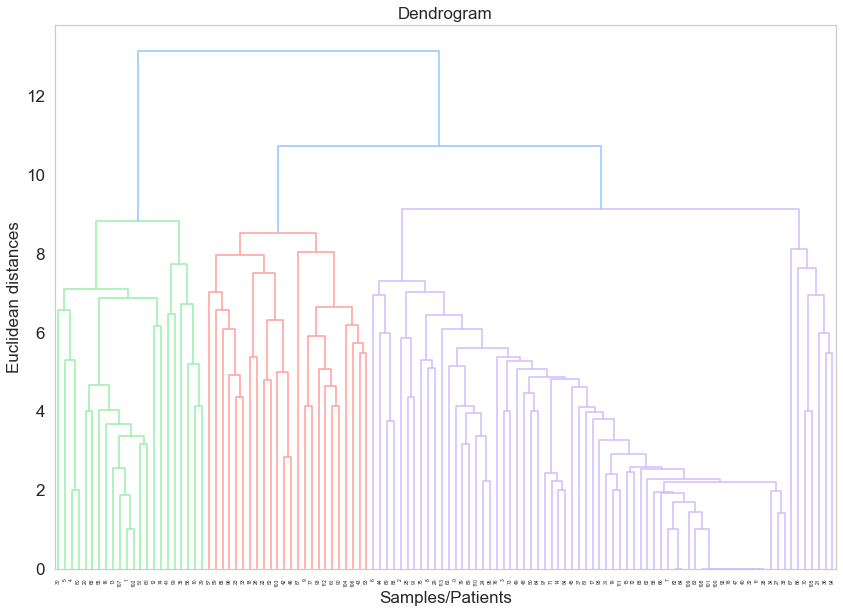

In [36]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

y_hc=hc.fit(all_binary_result)

#get rows' clusters
membership = hc.labels_
binary_clusters = pd.DataFrame(all_binary_result).copy()
binary_clusters['clusters'] = membership


fig=plt.figure(figsize=(14, 10)) 
dendrogram = sch.dendrogram(sch.linkage(all_binary_result, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Samples/Patients')
plt.ylabel('Euclidean distances')
plt.axhline(y=14, color='r', linestyle='--')
plt.show()

In [37]:
# save membership to csv file for clinical signatures
membership_value = pd.DataFrame()
membership_value['membership'] = membership
membership_value.to_csv(r'Classification/membership_value.csv', index=False, mode = 'w')


dataset_membership = pd.read_csv('Classification/new_balanced_no_AB.csv');
dataset_membership['membership'] = membership
dataset_membership.to_csv(r'Classification/dataset_membership_with_case.csv', index=False, mode = 'w')
dataset_membership = dataset_membership.drop(columns=['Case'])
dataset_membership.to_csv(r'Classification/dataset_membership.csv', index=False, mode = 'w')


In [38]:
# membership.value_counts().sum()

import collections, numpy
collections.Counter(membership)

Counter({0: 68, 1: 22, 2: 24})

In [39]:
import seaborn as sns; sns.set(color_codes=True)
heatmap_binary = all_binary_result
heatmap_binary.columns = pd.MultiIndex.from_product([['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear'], 
                                                     np.arange(1, 23, 1)], 
                                                   names=['Classifiers', 'Subsets of Features'])
# ### For tree colors
clusters = binary_clusters.pop("clusters")

#### [0 - FN - 22] [1 - FP - 24] [2 - TP&TN - 68]

In [40]:
clusters.value_counts()

0    68
2    24
1    22
Name: clusters, dtype: int64

## 6: Cluster Heatmap  <a class="anchor" id="chapter6"></a>

/Users/mohammed/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


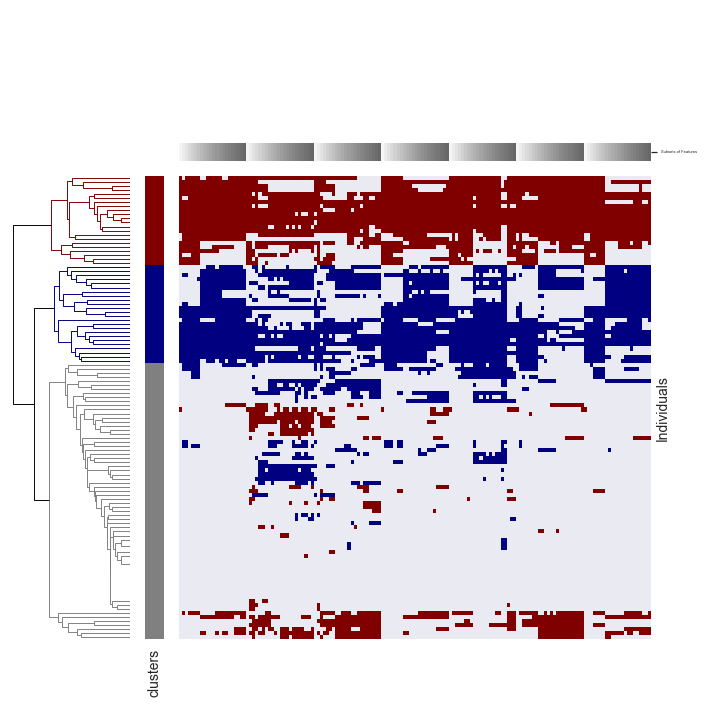

In [41]:
from matplotlib.colors import LinearSegmentedColormap
#### classifiers level
classi_labels = heatmap_binary.columns.get_level_values("Classifiers")
classi_pal = sns.cubehelix_palette(classi_labels.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
classi_lut = dict(zip(map(str, classi_labels.unique()), classi_pal))

#### Create index using the columns for classifiers
classi_colors = pd.Series(classi_labels, index=heatmap_binary.columns).map(classi_lut)

#### subsets level
subset_labels = heatmap_binary.columns.get_level_values("Subsets of Features")
subset_pal = sns.cubehelix_palette(subset_labels.unique().size, as_cmap=True, hue=0, start=0.3, light=1.0, dark=0.0,rot=-10.0, gamma=10.0)

#### Create index using the columns for subsets
subset_colors = pd.Series(subset_labels, index=heatmap_binary.columns).map(subset_pal)

# classi_subset_colors = pd.DataFrame(subset_colors)
classi_subset_colors = pd.DataFrame(subset_colors)#pd.DataFrame(classi_colors).join(pd.DataFrame(subset_colors))

### decoding colors for heatmap and dendograms
red=(0.5, 0.0, 0.0, 1.0)
blue=(0.0, 0.0, 0.5, 1.0)
black=(0.0, 0.0, 0.0, 0.0)
white=(1,1,1,1)
grey=(0.5, 0.5, 0.5, 1.0)

### tree clusters colors

clusters_lut = dict(zip(clusters.unique(), [grey, red, blue]))
row_colors = clusters.map(clusters_lut)
# df_colors = pd.DataFrame(data={'False Positive [18 Individuals]': row_colors[row_colors == blue], 'False Negative [22 Individuals]': row_colors[row_colors == red], 'Correctly Classified [62 Individuals]': row_colors[row_colors == grey]})

''''''''''''''''''
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=4)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels

plt.rcParams['savefig.facecolor']='white'

myColors = (blue,black, red)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))


# color bar keyword arguments
cbar_kws = {"shrink":1,
            'ticks': ['f',0,-1], # set ticks of color bar
            'label':'Color Bar'}

g = sns.clustermap(all_binary_result,
                    method= 'average',
                    metric= "euclidean",
                    col_cluster=False,
                    row_cluster=True,
                    col_colors = classi_subset_colors,
                    row_colors=row_colors,
                    cmap=cmap,
                    tree_kws=dict(linewidths=0.95, colors=([red]*21+[blue]*23+[grey]*67+[(0,0,0,1)]*2)),
                    linewidths=0.0,
                   rasterized=True,
                   xticklabels=False, 
                   yticklabels=False, 
                   center=0) 

g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(True)
g.ax_col_dendrogram.set_visible(True)

ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("Individuals")
plt.tight_layout()

plt.show()

g.savefig('Figures/all_subsets_clustermap.pdf',dpi=300, bbox_inches="tight")
g.savefig('Figures/all_subsets_clustermap.png',dpi=300, bbox_inches="tight")


## 7: Prepare Additional Features for Signature  <a class="anchor" id="chapter7"></a>

### Find all additional features for all 146 samples

In [42]:
cfas_full_dict = pd.read_excel('../data/CFAS_FULL_DICT.xlsx',header = 0)
master = pd.read_csv('../data/master.csv',header = 0)

cleansed_data = pd.read_csv('Classification/cleansed_data.csv')
cfas_features = cleansed_data.iloc[:,0:1].merge(master[cfas_full_dict.Features], how = 'inner', on = ['Case'])
missing_values = pd.DataFrame(cfas_features.isnull().sum()).reset_index()

missing_values.rename({'index':'Features', 0:'Number of missingness'}, axis=1,inplace=True)
missing_values.to_csv(r'Classification/missing_values.csv',mode = 'w',index=False)

no_missingness = missing_values[missing_values['Number of missingness'] == 0].reset_index(drop=True)
no_missingness.rename({'index':'Features', 0:'Number of missingness'}, axis=1,inplace=True)
no_missingness.to_csv(r'Classification/no_missingness.csv',mode = 'w',index=False)

In [43]:
master = pd.read_csv('../data/master.csv',header = 0)
# clinical_features = pd.read_csv('../data/clinical features.csv',header = 0)

# aa = pd.read_csv('Classification/dataset_membership.csv')
additinal_features = pd.read_csv('Classification/no_missingness.csv',header = 0)

new_balanced_no_AB = pd.read_csv('Classification/new_balanced_no_AB.csv')
selected_additinal_features = new_balanced_no_AB.iloc[:,0:1].merge(master[additinal_features.Features], how = 'inner', on = ['Case'])
selected_additinal_features

''' Adjusment of brain weight based on gender '''
women_braiwgt = selected_additinal_features[selected_additinal_features.sex == 'Women']
men_braiwgt = selected_additinal_features[selected_additinal_features.sex == 'Men']
gender_missing = selected_additinal_features[selected_additinal_features.sex.isnull()]

#Calculate z-score by mean
from scipy import stats
women_braiwgt_zscore = stats.zscore(women_braiwgt['brain weight'], nan_policy='omit')
men_braiwgt_zscore = stats.zscore(men_braiwgt['brain weight'], nan_policy='omit')
women_braiwgt['brain weight'] = women_braiwgt_zscore
men_braiwgt['brain weight'] = men_braiwgt_zscore

selected_additinal_features = pd.concat([women_braiwgt, men_braiwgt])
selected_additinal_features = pd.concat([selected_additinal_features, gender_missing])
selected_additinal_features.sort_values(by='Case', inplace=True)

membership_value = pd.read_csv('Classification/membership_value.csv',header = 0) # read clinical dataset
selected_additinal_features['membership'] = membership_value.membership.copy()
values = pd.DataFrame(membership_value.membership).copy()
selected_additinal_features['cluster'] = values.membership.replace({0:'TP&TN', 1:'FN', 2:'FP'})

selected_additinal_features.replace({'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
selected_additinal_features.replace({'Men':0, 'Women':1}, inplace=True)
selected_additinal_features.replace({"Don't know" :-1}, inplace=True)
selected_additinal_features.replace({'Yes':1}, inplace=True)

'''
        This file is used for clinical signatures by (https://github.com/emmanueljammeh/cfas)
        
'''
selected_additinal_features.to_csv(r'Classification/selected_additinal_features_with_memberships.csv',mode = 'w',index=False)

selected_additinal_features



/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Case,sex,age,brain weight,vrspc,lossh,gliosh,pickh,lewyh,spongh,...,balloont,lewyf,lewyt,spongf,spongt,losss,glioss,lewys,membership,cluster
82,1,1,74.0,-0.032501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
101,2,1,95.0,-0.990416,0,3,2,0,0,0,...,0,0,0,0,0,1,1,0,0,TP&TN
3,4,1,85.0,-0.032501,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,TP&TN
40,5,1,70.0,-0.032501,1,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,TP&TN
33,6,0,88.0,0.294356,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,2,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,15003,1,91.0,-0.519441,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
14,20195,1,87.0,1.643850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,TP&TN
32,23193,0,74.0,-0.114967,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
72,23493,0,73.0,0.635459,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN


In [44]:
selected_additinal_features.cluster.value_counts()

TP&TN    68
FP       24
FN       22
Name: cluster, dtype: int64

In [45]:
''' Additional Features for the held-out set'''

#read dataset for selected clinical signature features
heldout_data = pd.read_csv('Classification/not_selected.csv');

cfas_features_heldout = heldout_data.merge(master[additinal_features.Features], how = 'inner', on = ['Case'])
# missing_values_heldout = pd.DataFrame(cfas_features_heldout.isnull().sum()).reset_index()

heldout_data_with_additinal = heldout_data.iloc[:,:-1].merge(master[additinal_features.Features], how = 'inner', on = ['Case'])
heldout_data_with_additinal['dem_nver4'] = heldout_data.iloc[:,-1]

heldout_data_with_additinal.to_csv(r'Classification/heldout_data_with_additinal.csv',mode = 'w',index=False)

heldout_data_with_additinal

,Case,BraakStage,BrainNetStage,CAAType,CAAMeningeal,ThalStage,CAAParenc,CAATotalSev,MTSPETSA,SubpialBrainstem,...,balloonf,balloont,lewyf,lewyt,spongf,spongt,losss,glioss,lewys,dem_nver4
0,3,2.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,1.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
1,19,4.0,3.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
2,26,4.0,3.0,1.0,8.0,3.0,6.0,14.0,1.0,1.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
3,31,3.0,1.0,2.0,2.0,1.0,1.0,3.0,0.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
4,37,3.0,2.0,1.0,7.0,4.0,6.0,13.0,0.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
5,39,4.0,3.0,1.0,4.0,4.0,0.0,4.0,0.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
6,40,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
7,45,5.0,6.0,1.0,10.0,4.0,8.0,18.0,1.0,1.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
8,49,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,No,No,No,Mild,No,No,Dementia
9,54,5.0,4.0,2.0,7.0,4.0,6.0,13.0,0.0,1.0,...,No,No,No,No,No,No,Mild,No,No,Dementia


## 8: additional features Signature Figure  <a class="anchor" id="chapter8"></a>

From Emmanuel A. Jammeh code results, the file shows the features with their coefficient values that are having association with the three clusters (FP, FN, and TP&TN), (Cluster2, Cluster1, Cluster0) respectivily

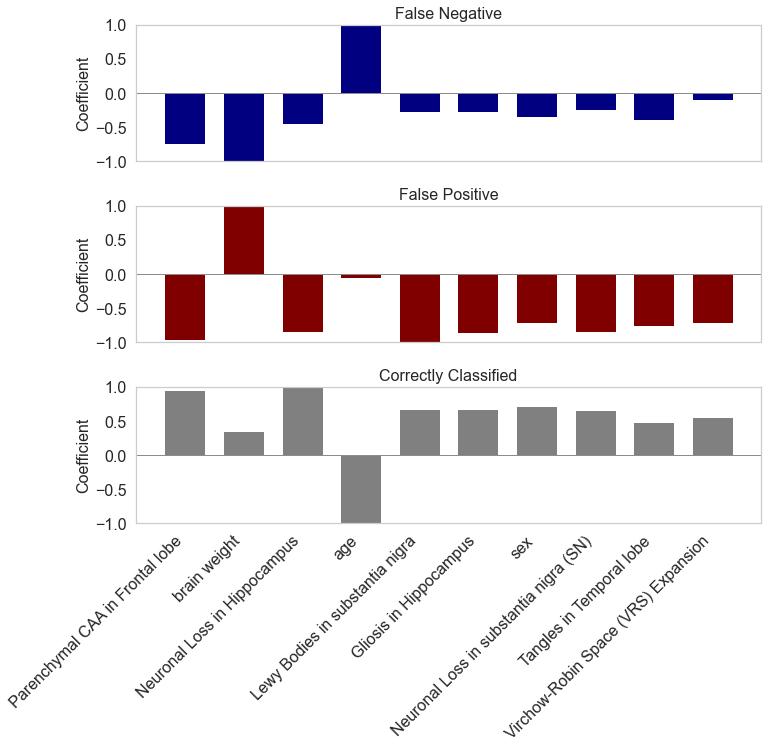

In [46]:
clinical_singnature = pd.read_csv('../data/relevant_clinical_signatures_coefficients.csv',header = 0)
cfas_full_dict = pd.read_excel('../data/CFAS_FULL_DICT.xlsx',header = 0)
clinical_singnature = pd.merge(clinical_singnature, cfas_full_dict, right_on='Features', left_on='features')
clinical_singnature

numeric_cols=['Cluster0', 'Cluster1', 'Cluster2']                     # numeric features
clinical_singnature[numeric_cols]=MinMaxScaler(feature_range=(-1, 1)).fit_transform(clinical_singnature[numeric_cols])  # transform

clinical_singnature['Sum'] = clinical_singnature.iloc[:,1:4].abs().sum(axis=1)
clinical_singnature.sort_values(by='Sum', inplace=True, ascending=False)
clinical_singnature


red=(0.5, 0.0, 0.0, 1.0)
blue=(0.0, 0.0, 0.5, 1.0)
grey=(0.5, 0.5, 0.5, 1.0)

%config InlineBackend.figure_format ='retina'
sns.set_style("whitegrid", {'axes.grid' : False})
# plt.subplots_adjust(wspace=0.10)
fig= plt.figure(figsize=(10,8))
size = 16
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels

ax = plt.subplot(3,1,1)
ax.bar(clinical_singnature.features, clinical_singnature.Cluster1, width=0.7, color=blue)
ax.axhline(y=0, color='k', linewidth=.5)
plt.ylabel('Coefficient')
plt.xticks(' ')
plt.title('False Negative')
plt.ylim(-1, 1,0.25)
plt.tight_layout()

ax = plt.subplot(3,1,2)
ax.bar(clinical_singnature.features, clinical_singnature.Cluster2, width=0.7, color=red)
ax.axhline(y=0, color='k', linewidth=.5)
plt.ylabel('Coefficient')
plt.xticks(' ')
plt.title('False Positive')
plt.ylim(-1, 1)
plt.tight_layout()

ax = plt.subplot(3,1,3)
ax.bar(clinical_singnature.features, clinical_singnature.Cluster0, width=0.7, color=grey)
plt.ylabel('Coefficient')
plt.title('Correctly Classified')
ax.axhline(y=0, color='k', linewidth=.5)
plt.tight_layout()
plt.xticks(clinical_singnature.features, clinical_singnature.Meaning, rotation=45, horizontalalignment="right")
plt.ylim(-1, 1)


plt.savefig('Figures/additional features signature.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/additional features signature.pdf', dpi=300, bbox_inches='tight')


In [47]:
selected_additinal_features = pd.read_csv('Classification/selected_additinal_features_with_memberships.csv',header = 0)
clinical_singnature = pd.read_csv('../data/relevant_clinical_signatures_coefficients.csv',header = 0).features
clinical_singnature

selected_additinal_features
signature_feature_data = selected_additinal_features[clinical_singnature]
signature_feature_data['Cluster'] = selected_additinal_features['cluster']


features = ['age','amyparf','brain_weight','gliosh','lewys','lossh','losss','sex','tanglest','vrspc']


signature_feature_data.vrspc.replace({0:'No', 1:'Yes'}, inplace=True)
signature_feature_data.sex.replace({0:'Men', 1:'Women'}, inplace=True)
signature_feature_data.replace({0:'No', 1:'Mild', 2:'Moderate', 3:'Severe'}, inplace=True)
signature_feature_data.Cluster.replace({'FP':'False Positive', 
                                        'FN':'False Negative', 
                                        'TP&TN':'Correctly Classified'},
                                       inplace=True)
signature_feature_data


/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/mohammed/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Users/mohammed/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,age,amyparf,brain weight,gliosh,lewys,lossh,losss,sex,tanglest,vrspc,Cluster
0,74.0,No,-0.032501,No,No,No,No,Women,No,No,Correctly Classified
1,95.0,No,-0.990416,Moderate,No,Severe,Mild,Women,Severe,No,Correctly Classified
2,85.0,No,-0.032501,No,No,No,Mild,Women,Mild,No,Correctly Classified
3,70.0,No,-0.032501,No,No,No,Moderate,Women,No,Yes,Correctly Classified
4,88.0,No,0.294356,Mild,No,Moderate,No,Men,No,No,False Positive
...,...,...,...,...,...,...,...,...,...,...,...
109,91.0,No,-0.519441,No,No,No,No,Women,Mild,Yes,Correctly Classified
110,87.0,No,1.643850,No,Mild,No,No,Women,No,Yes,Correctly Classified
111,74.0,No,-0.114967,No,No,No,No,Men,No,Yes,Correctly Classified
112,73.0,No,0.635459,No,No,No,No,Men,No,No,Correctly Classified


In [48]:
selected_additinal_features.cluster.value_counts()

TP&TN    68
FP       24
FN       22
Name: cluster, dtype: int64

In [49]:
selected_additinal_features.membership.value_counts()

0    68
2    24
1    22
Name: membership, dtype: int64

<Figure size 432x288 with 0 Axes>

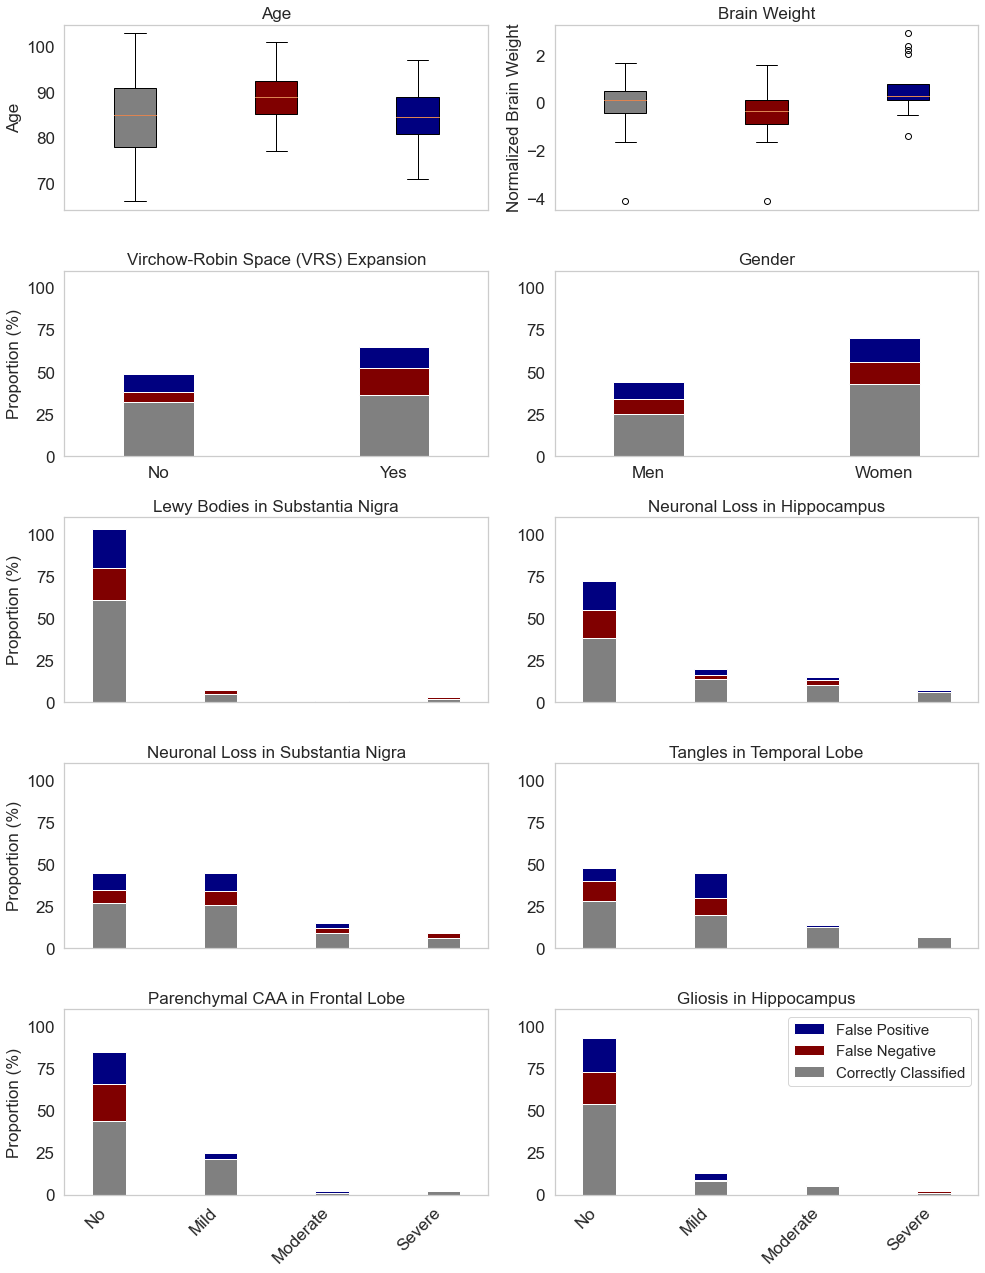

In [50]:
# labels_order =['Severe', 'Moderate', 'Mild', 'No']
labels_order =['No', 'Mild', 'Moderate', 'Severe']
legend_order = ['False Positive', 'False Negative', 'Correctly Classified']
width = 0.3

%config InlineBackend.figure_format ='retina'
sns.set_style("whitegrid", {'axes.grid' : False})
#     plt.rcParams['font.size'] = '21'
size = 17
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels

red=(0.5, 0.0, 0.0, 1.0)
blue=(0.0, 0.0, 0.5, 1.0)
grey=(0.5, 0.5, 0.5, 1.0)

bar_colors = ['g', 'b', 'orange', 'r']
plt.subplots_adjust(wspace=0.35)
fig= plt.figure(figsize=(14,18))

ax = plt.subplot(5,2,1)
age_FP = selected_additinal_features[selected_additinal_features['cluster'] == 'FP']['age']
age_FN = selected_additinal_features[selected_additinal_features['cluster'] == 'FN']['age']
age_correctly = selected_additinal_features[selected_additinal_features['cluster'] == 'TP&TN']['age']
dataset = [age_correctly, age_FN, age_FP]
labels = ['Correctly Classified', 'False Negative', 'False Positive']
bplot = ax.boxplot(dataset,vert=True,patch_artist=True,labels=labels)
colors = [grey, red, blue]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
# ax.boxplot(dataset,vert=True, patch_artist=True,labels=labels)
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title('Age')
plt.xticks(rotation=0)
ax.set_xticks([])

ax = plt.subplot(5,2,2)
brain_weight_FP = selected_additinal_features[selected_additinal_features['cluster'] == 'FP']['brain weight']
brain_weight_FN = selected_additinal_features[selected_additinal_features['cluster'] == 'FN']['brain weight']
brain_weight_correctly = selected_additinal_features[selected_additinal_features['cluster'] == 'TP&TN']['brain weight']
dataset = [brain_weight_correctly, brain_weight_FN, brain_weight_FP]
labels = ['Correctly Classified', 'False Negative', 'False Positive']
bplot = ax.boxplot(dataset,vert=True,patch_artist=True,labels=labels)
colors = [grey,red,blue]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('')
# ax.set_xticks([])
plt.ylabel('Normalized Brain Weight')
# plt.title('Decision Tree')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title('Brain Weight')
plt.xticks(rotation=0)
ax.set_xticks([])

ax = plt.subplot(5,2,3)
bplot = signature_feature_data.groupby(['vrspc', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='vrspc', values=0)
bplot.plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title('Virchow-Robin Space (VRS) Expansion')
plt.xticks(rotation=0)
plt.ylim(0,110)

ax = plt.subplot(5,2,4)
bplot = signature_feature_data.groupby(['sex', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='sex', values=0)
bplot.plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.title("Gender")
plt.xticks(rotation=0)
plt.ylim(0,110)

ax = plt.subplot(5,2,5)
bplot = signature_feature_data.groupby(['lewys', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='lewys', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
# ax.set_xticks([])
plt.title("Lewy Bodies in Substantia Nigra")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,6)
bplot = signature_feature_data.groupby(['lossh', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='lossh', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
# plt.ylabel('Proportion (%)')
# ax.set_xticks([])
plt.title("Neuronal Loss in Hippocampus")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,7)
bplot = signature_feature_data.groupby(['losss', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='losss', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title("Neuronal Loss in Substantia Nigra")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,8)
bplot = signature_feature_data.groupby(['tanglest', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='tanglest', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
# plt.ylabel('Proportion (%)')
plt.title("Tangles in Temporal Lobe")
# plt.xticks(rotation=45, horizontalalignment="right")
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,9)
bplot = signature_feature_data.groupby(['amyparf', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='amyparf', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title("Parenchymal CAA in Frontal Lobe")
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45, horizontalalignment="right")
plt.ylim(0,110)

ax = plt.subplot(5,2,10)
bplot = signature_feature_data.groupby(['gliosh', 'Cluster']).size().reset_index().pivot(columns='Cluster', index='gliosh', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, color=colors)
# plt.ylabel('Proportion (%)')
plt.xlabel('')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title("Gliosis in Hippocampus")
handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in legend_order]
ax.legend(handles_order, legend_order)

plt.xticks(rotation=45, horizontalalignment="right")
plt.ylim(0,110)


plt.tight_layout()
plt.savefig('Figures/cluster_signature.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/cluster_signature.pdf', dpi=300, bbox_inches='tight')


In [51]:
selected_additinal_features

,Case,sex,age,brain weight,vrspc,lossh,gliosh,pickh,lewyh,spongh,...,balloont,lewyf,lewyt,spongf,spongt,losss,glioss,lewys,membership,cluster
0,1,1,74.0,-0.032501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
1,2,1,95.0,-0.990416,0,3,2,0,0,0,...,0,0,0,0,0,1,1,0,0,TP&TN
2,4,1,85.0,-0.032501,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,TP&TN
3,5,1,70.0,-0.032501,1,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,TP&TN
4,6,0,88.0,0.294356,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,2,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,15003,1,91.0,-0.519441,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
110,20195,1,87.0,1.643850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,TP&TN
111,23193,0,74.0,-0.114967,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN
112,23493,0,73.0,0.635459,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TP&TN


In [52]:
master = pd.read_csv('../data/master.csv',header = 0)
# clinical_features = pd.read_csv('../data/clinical features.csv',header = 0)

additinal_features = pd.read_csv('Classification/no_missingness.csv',header = 0)
additinal_features = additinal_features.append([{'Features':'dem_nver4','Number of missingness':0}], ignore_index = True)

new_balanced_no_AB = pd.read_csv('Classification/new_balanced_no_AB.csv')
selected_additinal_features = new_balanced_no_AB.iloc[:,0:1].merge(master[additinal_features.Features], how = 'inner', on = ['Case'])
selected_additinal_features

membership_value = pd.read_csv('Classification/membership_value.csv',header = 0) # read clinical dataset
selected_additinal_features['membership'] = membership_value.membership.copy()
values = pd.DataFrame(membership_value.membership).copy()
selected_additinal_features['cluster'] = values.membership.replace({0:'TP&TN', 1:'FN', 2:'FP'})

selected_additinal_features





,Case,sex,age,brain weight,vrspc,lossh,gliosh,pickh,lewyh,spongh,...,lewyf,lewyt,spongf,spongt,losss,glioss,lewys,dem_nver4,membership,cluster
0,27491,Men,91.0,1200.0,No,Mild,No,No,No,No,...,Yes,Yes,No,No,Sev,No,Sev,Dementia,0,TP&TN
1,17,Men,93.0,940.0,Yes,No,No,No,No,No,...,No,No,No,No,Mod,Mild,No,Dementia,1,FN
2,6909,Men,86.0,1330.0,Yes,Mild,No,No,No,No,...,No,No,Yes,No,No,No,No,No dementia,0,TP&TN
3,4,Women,85.0,1100.0,No,No,No,No,No,No,...,No,No,No,No,Mild,No,No,No dementia,0,TP&TN
4,65,Women,99.0,1010.0,Yes,No,No,No,No,No,...,No,No,No,No,Mild,No,No,Dementia,1,FN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,73,Women,94.0,1300.0,No,Mild,No,No,No,No,...,No,No,No,No,Mild,No,No,Dementia,0,TP&TN
110,114,Women,99.0,1200.0,Yes,No,No,No,No,No,...,No,No,No,No,Mild,No,No,Dementia,0,TP&TN
111,10596,Women,97.0,1190.0,Yes,Mild,No,No,No,No,...,No,No,No,No,No,No,No,Dementia,0,TP&TN
112,24,Women,76.0,1120.0,No,No,No,No,No,Mild,...,No,No,No,No,Mild,No,No,No dementia,2,FP


In [53]:
''' Find mean values for age'''
import statistics

dementia = selected_additinal_features[(selected_additinal_features.dem_nver4 == 'Dementia')]
no_dementia = selected_additinal_features[(selected_additinal_features.dem_nver4 == 'No dementia')]

TPTN = selected_additinal_features[(selected_additinal_features.cluster == 'TP&TN')]
FPFN = selected_additinal_features[~(selected_additinal_features.cluster == 'TP&TN')]
TP = TPTN[(TPTN.dem_nver4 == 'Dementia')]
TN = TPTN[(TPTN.dem_nver4 == 'No dementia')]
FP = selected_additinal_features[selected_additinal_features.cluster == 'FP']
FN = selected_additinal_features[selected_additinal_features.cluster == 'FN']

print('----- Mean Ages ------')
print('TP&TN = ', statistics.mean(TPTN.age))
print('FP&FN = ', statistics.mean(FPFN.age))
print('TP = ', statistics.mean(TP.age))
print('TN = ', statistics.mean(TN.age))
print('FP = ', statistics.mean(FP.age))
print('FN = ', statistics.mean(FN.age))

print('\n----- Mean Brain Weight ------')
print('TP&TN = ', statistics.mean(TPTN['brain weight']))
print('FP&FN = ', statistics.mean(FPFN['brain weight']))
print('TP = ', statistics.mean(TP['brain weight']))
print('TN = ', statistics.mean(TN['brain weight']))
print('FP = ', statistics.mean(FP['brain weight']))
print('FN = ', statistics.mean(FN['brain weight']))

----- Mean Ages ------
TP&TN =  84.6470588235294
FP&FN =  86.80434782608695
TP =  88.54285714285714
TN =  80.51515151515152
FP =  84.54166666666667
FN =  89.27272727272727

----- Mean Brain Weight ------
TP&TN =  1150.0735294117646
FP&FN =  1140.9347826086957
TP =  1121.6
TN =  1180.2727272727273
FP =  1224.75
FN =  1049.5


In [54]:
import statistics
all_age85 = selected_additinal_features[selected_additinal_features.age > 84]
all_age85.reset_index(inplace=True, drop=True)
all_age84 = selected_additinal_features[selected_additinal_features.age < 85]
all_age84.reset_index(inplace=True, drop=True)
print('----- Age >=85 ------')
print('Number of cases >=85yrs = ', len(all_age85))
print('Mean age >=85 = ', statistics.mean(all_age85.age))
print('\nCount age >=85:')
print(all_age85.cluster.value_counts())

print('\n----- Age <85 ------')
print('Number of cases <85yrs = ', len(all_age84))
print('Mean age <85 = ', statistics.mean(all_age84.age))
print('\nCount age <85:')
print(all_age84.cluster.value_counts())


print('\n\n----- 40.4% for all age groups, the misclassified for <85 yrs old? and >=85yrs old? ------')
correct_age84 = all_age84[all_age84.cluster == 'TP&TN']
misclassified_age84 = all_age84[(all_age84.cluster == 'FP') | (all_age84.cluster == 'FN')]

correct_age85 = all_age85[all_age85.cluster == 'TP&TN']
misclassified_age85 = all_age85[(all_age85.cluster == 'FP') | (all_age85.cluster == 'FN')]

print('Number of cases >=85yrs = ', len(all_age85))
print('Number of cases <85yrs = ', len(all_age84))

print('\nMisclassified cases >=85yrs = ', len(misclassified_age85))
print('Misclassifiedcases <85yrs = ', len(misclassified_age84))

print('\nFor <85 years = ', round((len(misclassified_age84)/len(all_age84))*100,1),'%')
print('For >=85 years = ', round((len(misclassified_age85)/len(all_age85))*100,1),'%')

----- Age >=85 ------
Number of cases >=85yrs =  67
Mean age >=85 =  90.80597014925372

Count age >=85:
TP&TN    36
FN       19
FP       12
Name: cluster, dtype: int64

----- Age <85 ------
Number of cases <85yrs =  47
Mean age <85 =  77.97872340425532

Count age <85:
TP&TN    32
FP       12
FN        3
Name: cluster, dtype: int64


----- 40.4% for all age groups, the misclassified for <85 yrs old? and >=85yrs old? ------
Number of cases >=85yrs =  67
Number of cases <85yrs =  47

Misclassified cases >=85yrs =  31
Misclassifiedcases <85yrs =  15

For <85 years =  31.9 %
For >=85 years =  46.3 %


In [70]:
dataset_membership

# (dataset_membership.groupby(['dem_nver4', 'sex']).agg({'age': ['mean', 'count', 'median']}))
((dataset_membership.dem_nver4 == 0) & (dataset_membership.membership == 0)).sum()

33